### Objective of the Case study
- To understand what factors are important in graduate admissions
- Are these factors interrelated to each other 
- Making predictions about one's chance of getting admission
<br>
This analysis will help in analzing how and how much these variables affect the chances of getting the admission i.e. the weights of variables.

If we want to make predictions of whether a candidate will get admission or not then we'll consider 'Chance of Admit' as the target variable. While the remaining variable will be independent variable. <br>
But, whether these variables will independent among themselves as well, this can be checked by checking the multicollinearity.

###### Column profiling

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=  pd.read_csv("./Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


All the variables are numerical in nature.

In [4]:
df.shape

(500, 9)

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The median CGPA,TOEFL, GRE score are on higher side with values 8.56,107 and 317 respectively. <br>
<br>
we don't need column *Serial No.* for our analysis. Hence, we'll drop that column.

In [6]:
df.drop(['Serial No.'], axis = 1, inplace = True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
### Unique values
columns = ['University Rating', 'SOP', 'LOR ', 'Research']
for col in columns:
    print(f"There are {len(np.unique(df[col]))} unique values present in the columns {col} :",np.unique(df[col]))

There are 5 unique values present in the columns University Rating : [1 2 3 4 5]
There are 9 unique values present in the columns SOP : [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
There are 9 unique values present in the columns LOR  : [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
There are 2 unique values present in the columns Research : [0 1]


In [9]:
#Checking for duplicates
df.loc[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [10]:
# Missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing and null values present in the dataset.

In [11]:
print(df['Chance of Admit '].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
85%        0.89000
90%        0.92000
100%       0.97000
max        0.97000
Name: Chance of Admit , dtype: float64


C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


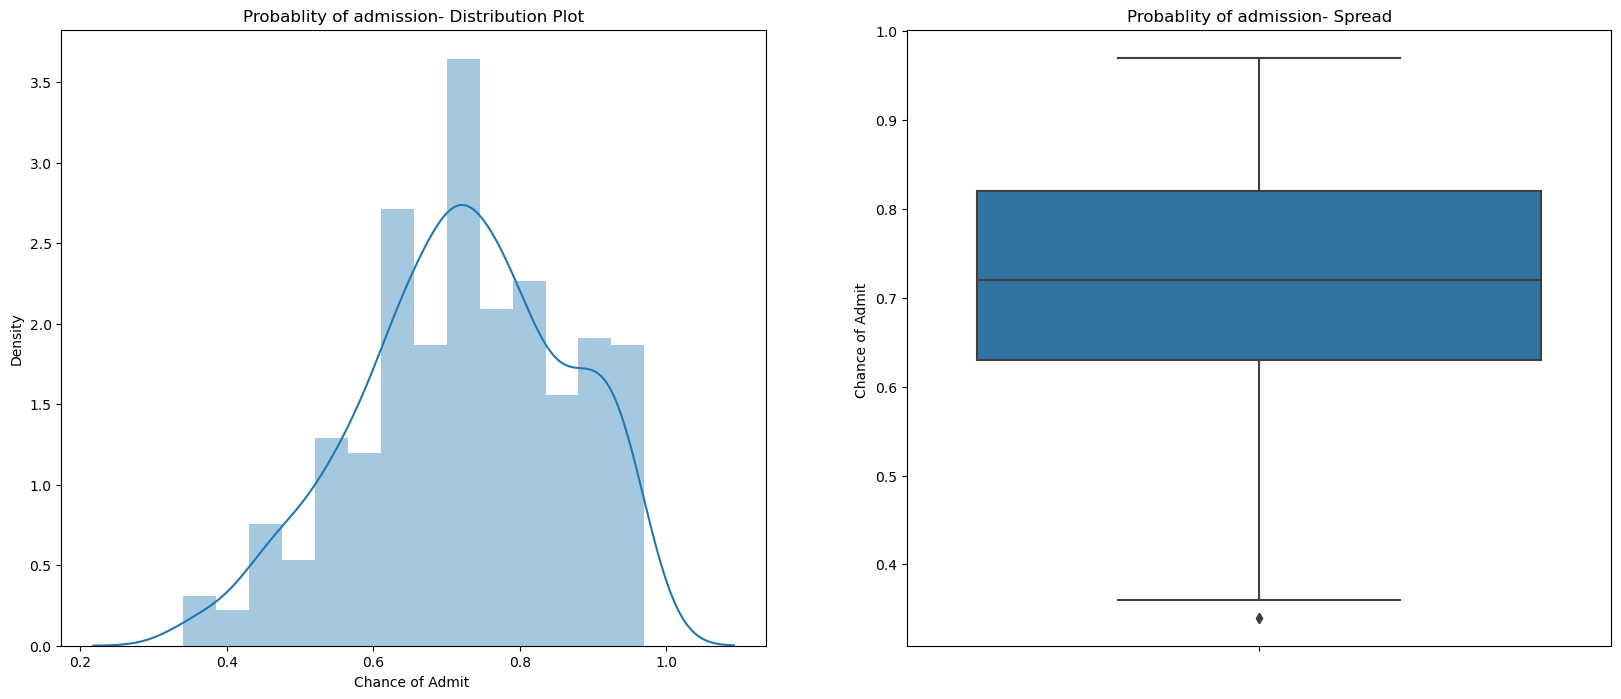

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Probablity of admission- Distribution Plot')
sns.distplot(df["Chance of Admit "])

plt.subplot(1,2,2)
plt.title('Probablity of admission- Spread')
sns.boxplot(y=df["Chance of Admit "])

plt.show()

###### Observation
- The data seems to be left skewed. This indicates that most of the students have chances of admission, 0.72 or above. 
- Mean and median of "chance of Admit " are almost same, this also indicates that majority of the student have higher chances of admission.

#### Univariate Analysis &  Bivariate Analysis

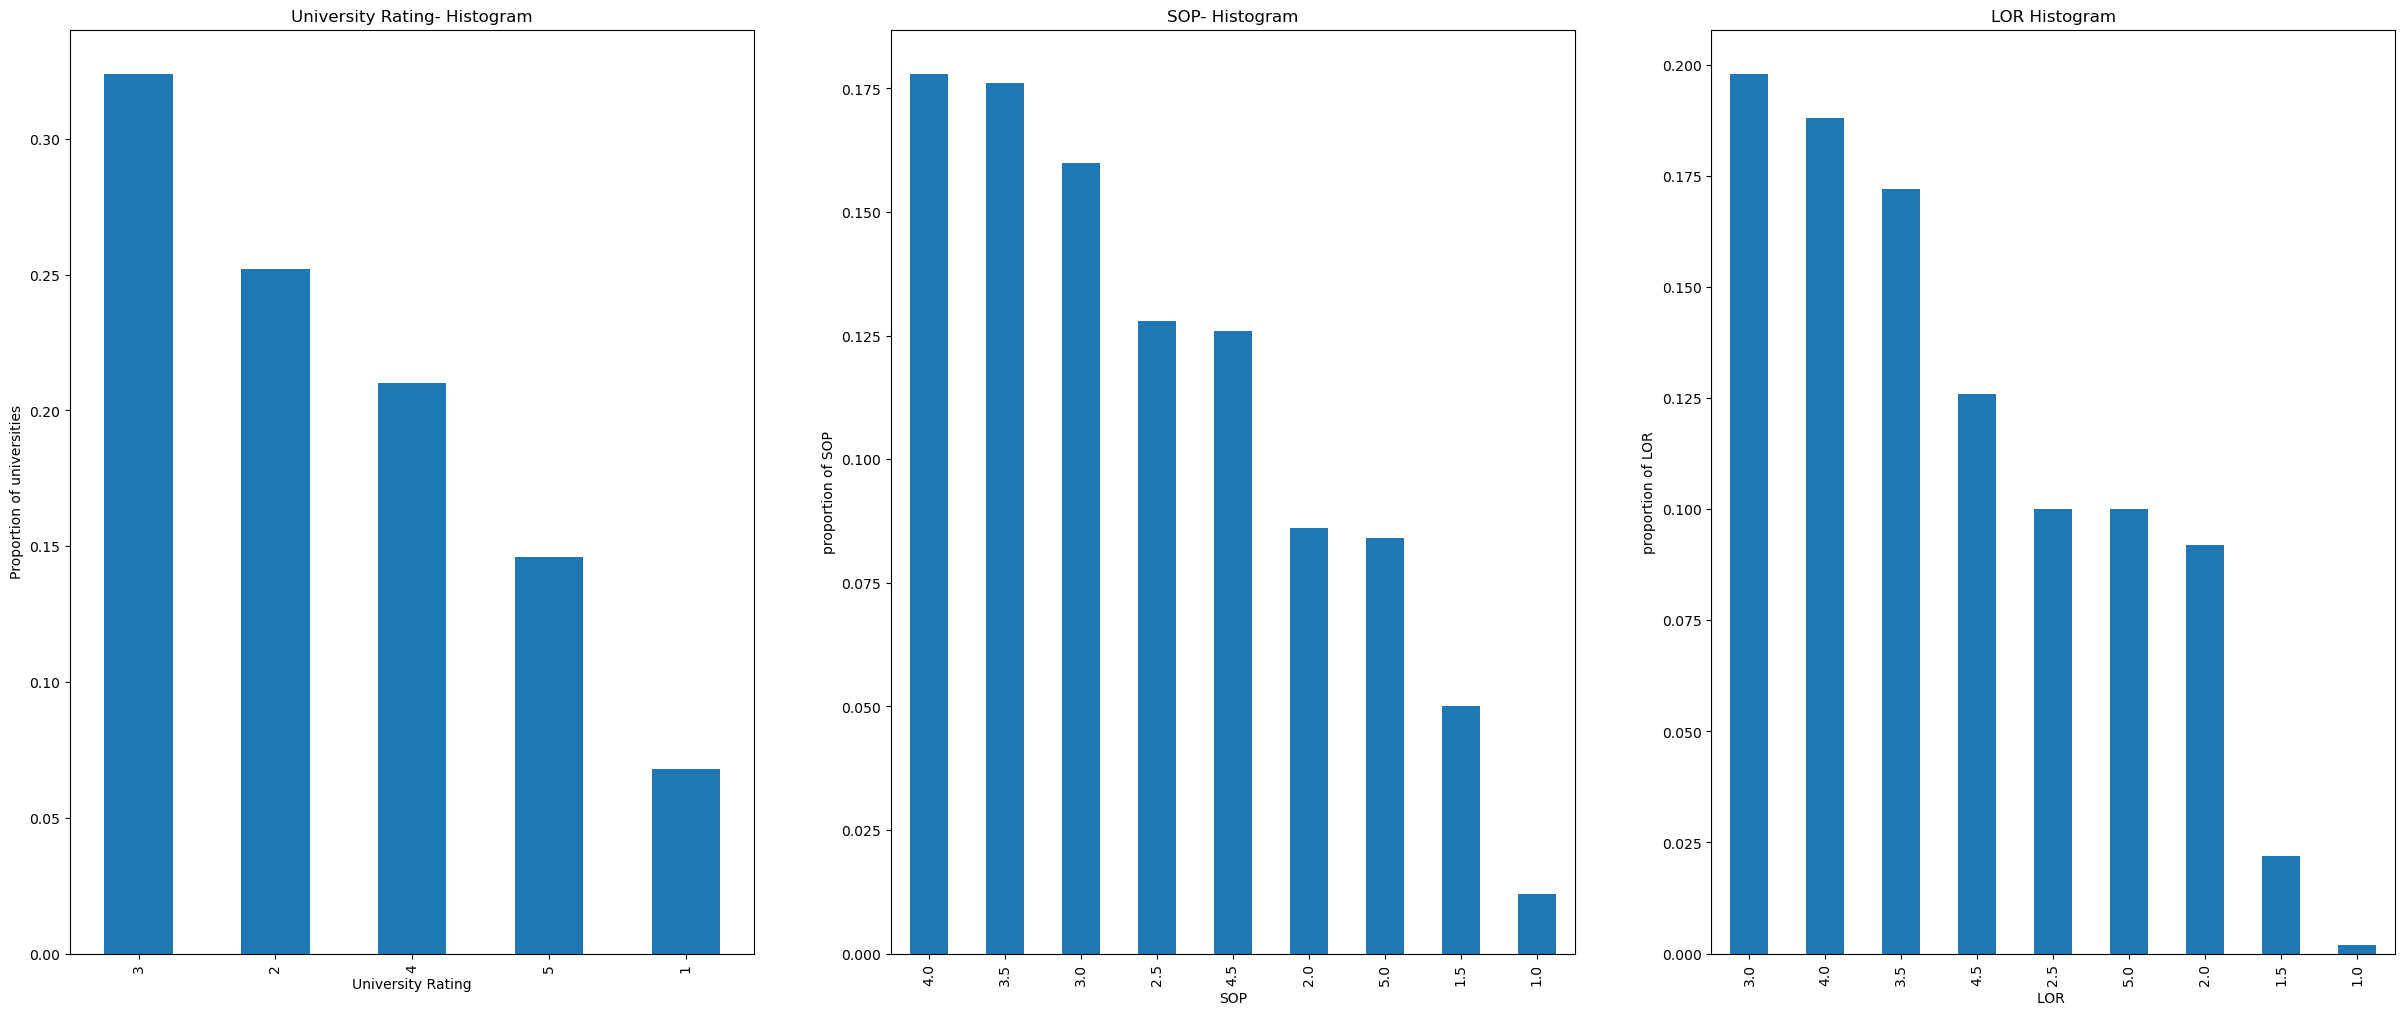

In [13]:
# categorical variables visualization
categ_columns = ['University Rating', 'SOP', 'LOR ', 'Research']
plt.figure(figsize=(30, 12))

plt.subplot(1,3,1)
plt1 = df["University Rating"].value_counts(normalize = True).plot(kind = 'bar')
plt.title('University Rating- Histogram')
plt1.set(xlabel = 'University Rating', ylabel='Proportion of universities')

plt.subplot(1,3,2)
plt2 = df["SOP"].value_counts(normalize = True).plot(kind ='bar')
plt.title('SOP- Histogram')
plt2.set(xlabel = 'SOP', ylabel='proportion of SOP')

plt.subplot(1,3,3)
plt3 = df["LOR "].value_counts(normalize = True).plot(kind = 'bar')
plt.title('LOR Histogram')
plt3.set(xlabel = 'LOR ', ylabel='proportion of LOR')

plt.show()

[Text(0.5, 0, 'Research'), Text(0, 0.5, 'proportion of Research')]

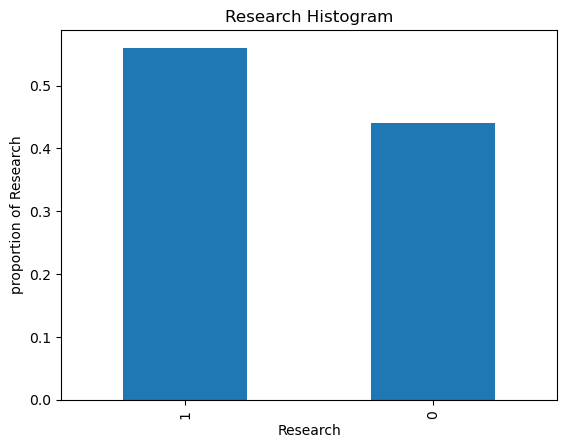

In [14]:
plt4 = df["Research"].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Research Histogram')
plt4.set(xlabel = 'Research', ylabel='proportion of Research')

###### Observation
- This shows that more than 50% of the students applies in foreign universities for research.
- 30% of the students applied to the universities that are ranked as `3` followed by universities that are ranked as `2`.
- Around 40% of the students have SOP strength in the range of [3,4].


In [15]:
# categorical variables visualization
# categ_columns = ['University Rating', 'SOP', 'LOR ', 'Research']
# plt.figure(figsize=(30, 12))

# plt.subplot(1,3,1)
# plt1 = sns.boxplot(x = df["University Rating"], y = df['Chance of Admit '])
# plt.title('University Rating- Histogram')
# plt1.set(xlabel = 'University Rating', ylabel='Chance of admission')

# plt.subplot(1,3,2)
# plt2 = sns.boxplot(x = df["SOP"], y = df['Chance of Admit '])
# plt.title('SOP- Histogram')
# plt2.set(xlabel = 'SOP', ylabel='Chance of admission')

# plt.subplot(1,3,3)
# plt3 = sns.boxplot(x = df["LOR "], y = df['Chance of Admit '])
# plt.title('LOR Histogram', fontsize = 10)
# plt3.set(xlabel = 'LOR ',  ylabel='Chance of admission')
# # plt3.set_xlabel("LOR",fontsize=20)
# # plt3.set_ylabel("Chance of admission",fontsize=20)

# plt.show()

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A Singh\anaconda

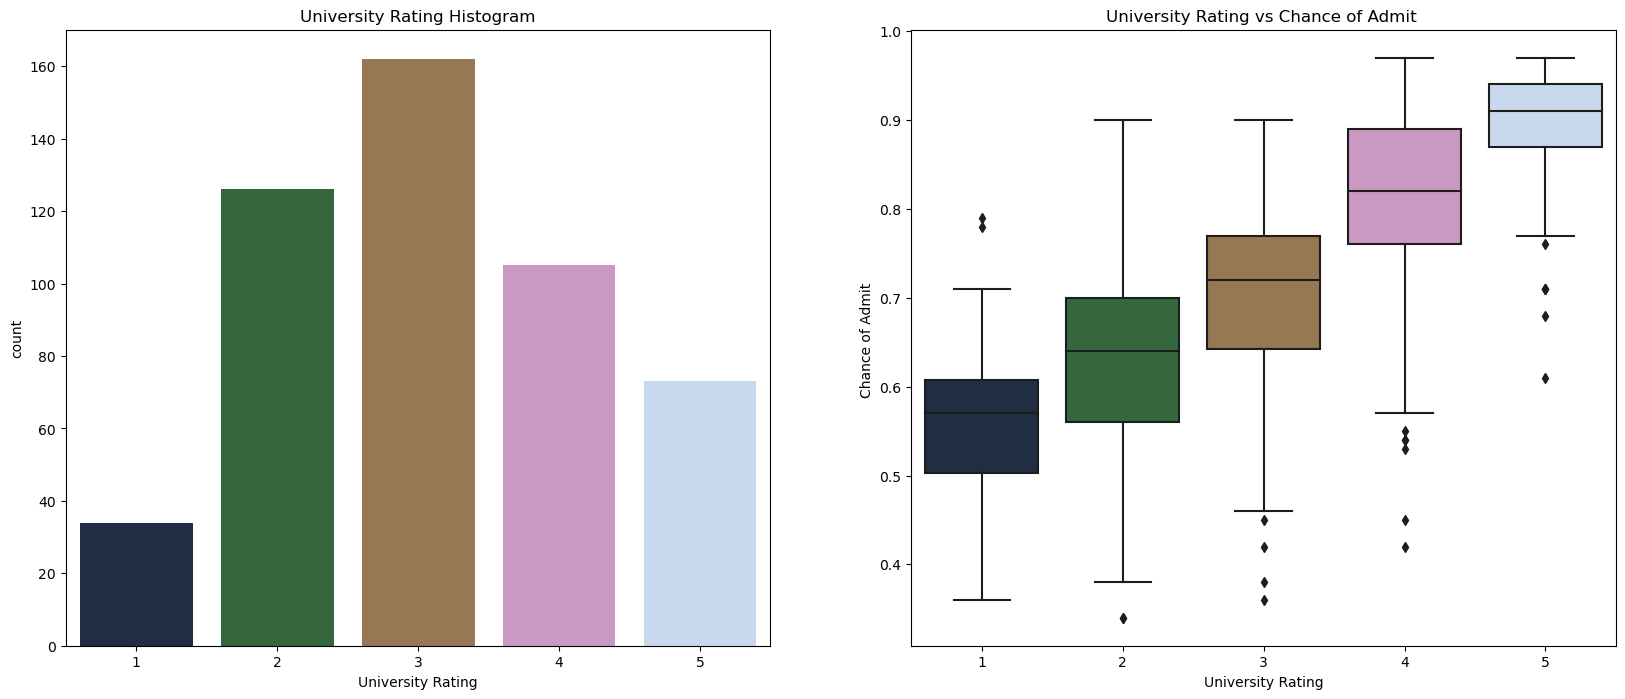

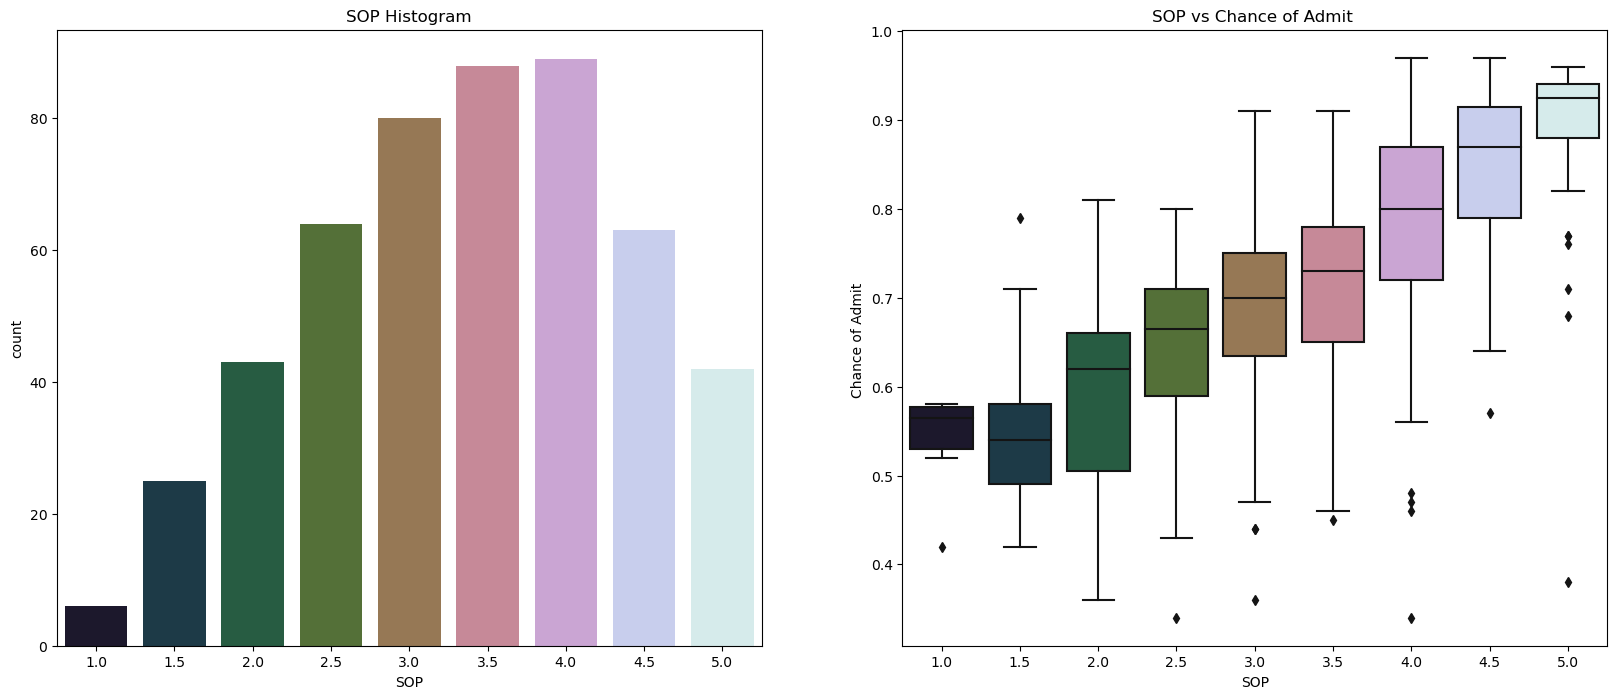

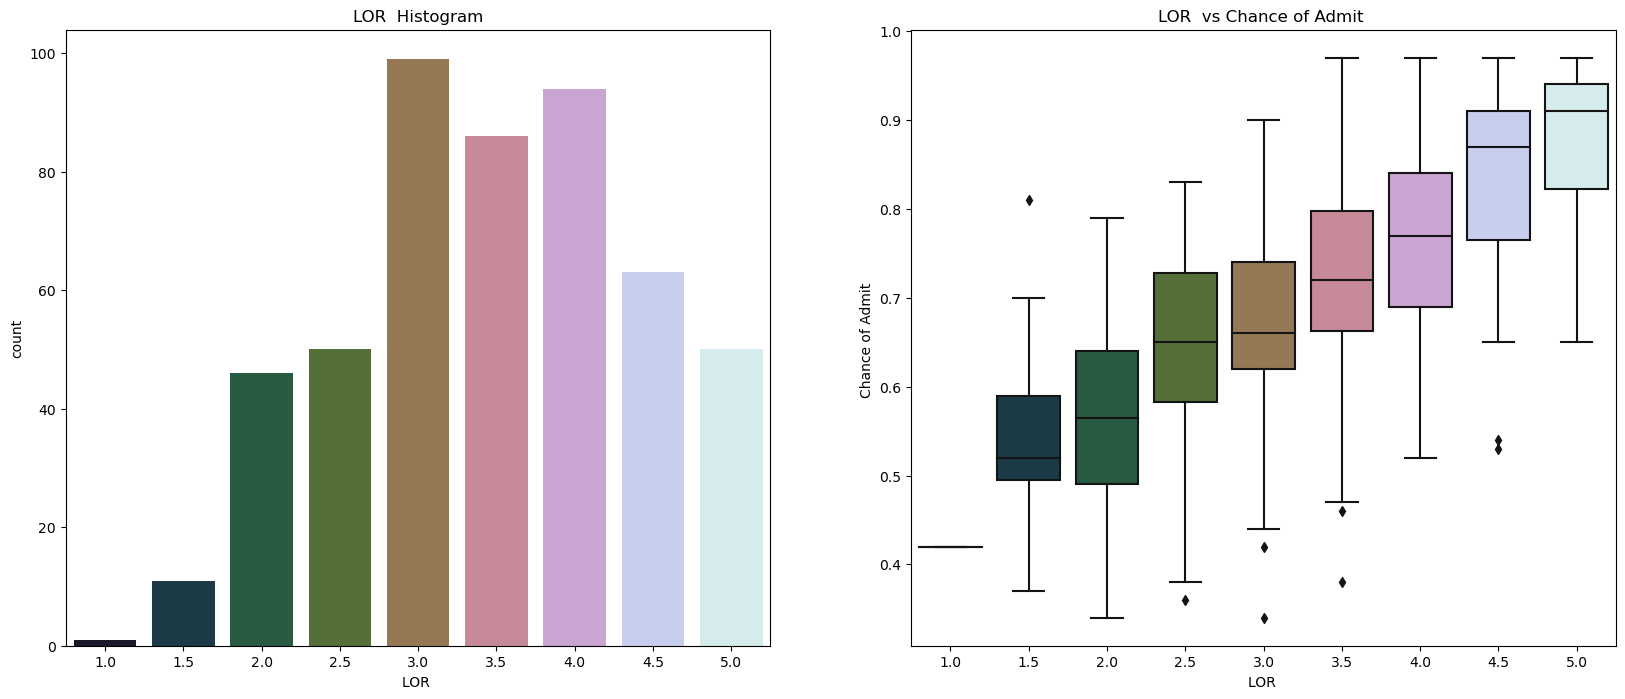

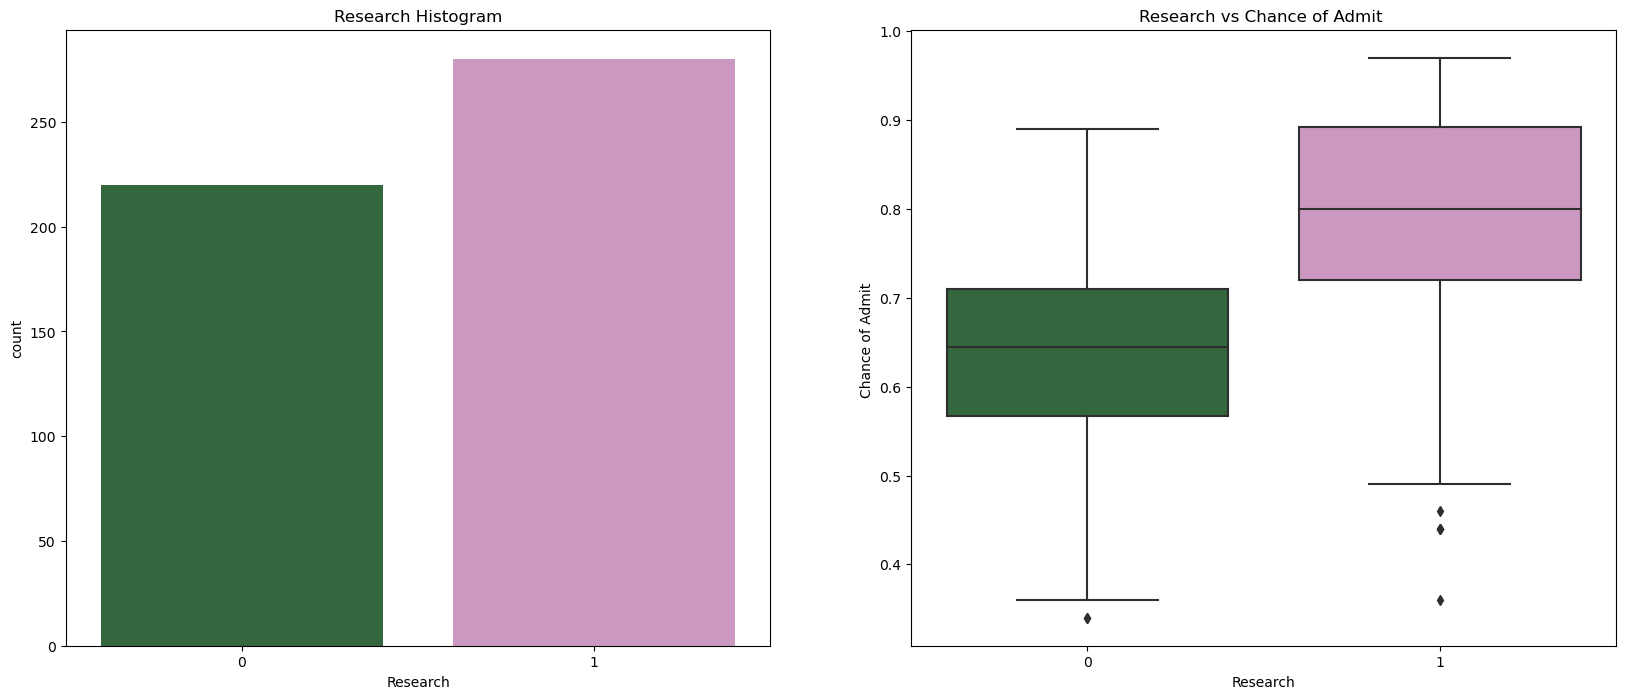

In [17]:
indep_variables_categ = ["University Rating",'SOP',"LOR ","Research"]
for col in indep_variables_categ:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f'{col} Histogram')
    sns.countplot(df[col], palette=("cubehelix"))

    plt.subplot(1,2,2)
    plt.title(f'{col} vs Chance of Admit ')
    sns.boxplot(x=df[col], y=df['Chance of Admit '], palette=("cubehelix"))

plt.show()

In [18]:
print(df['Research'].value_counts(normalize = True))

1    0.56
0    0.44
Name: Research, dtype: float64


###### Observations
- Max students have SOP strength in the range of [3,4], and chances of admission for such values can be between [0.7,0.8].
- Max students have LOR strength in the range of [3,4], and chances of admission for such values can be between [0.65,0.75].
- 56% of the students apply for research have chances of admission `0.8` while those who didn't apply for research have chances of `0.65`. 

But, why with increase in University Ranking probablity of admission is increasing?

In [19]:
df.loc[df['University Rating'] == 5].describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000
mean,327.890411,113.438356,5.0,4.479452,4.404110,9.278082,0.876712,0.888082
std,8.670771,4.536844,0.0,0.509891,0.593118,0.381075,0.331042,0.074715
min,303.000000,101.000000,5.0,3.000000,3.000000,7.920000,0.000000,0.610000
25%,323.000000,111.000000,5.0,4.000000,4.000000,9.080000,1.000000,0.870000
50%,330.000000,114.000000,5.0,4.500000,4.500000,9.300000,1.000000,0.910000
75%,334.000000,117.000000,5.0,5.000000,5.000000,9.530000,1.000000,0.940000
max,340.000000,120.000000,5.0,5.000000,5.000000,9.910000,1.000000,0.970000


This show that only the top perfroming students apply for the top universities. This is understandable because application process expensive. So, the students who are really confident that they can make it apply to top universities. <br>
This can be observed in the data above also. Students who applied in universities with rating 5 have mean GRE Score, TOEFL Score, SOP, LOR, CGPA as 330,114,4.5,4.5,9.3 respectively which is high as comparerd to mean values of all the dataset.

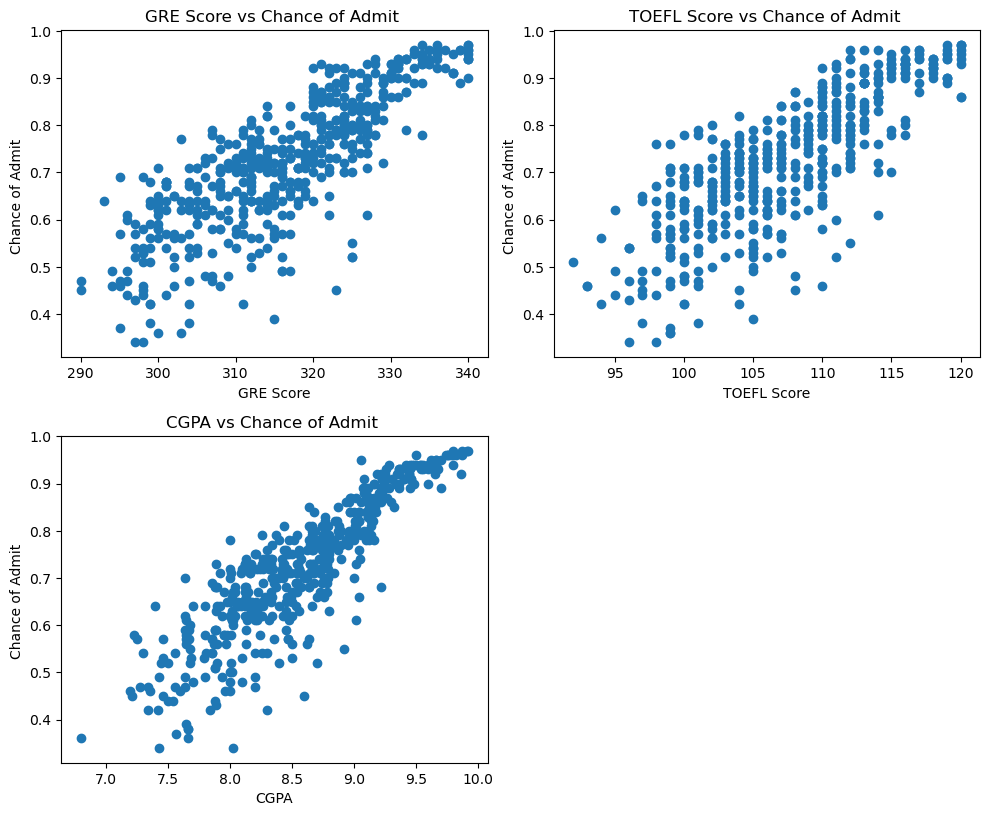

In [20]:
# Visualizing Numerical data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Chance of Admit '])
    plt.title(x+' vs Chance of Admit ')
    plt.ylabel('Chance of Admit ')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('GRE Score', 1)
scatter('TOEFL Score', 2)
scatter('CGPA', 3)


plt.tight_layout()

All the variables, GRE Score, CGPA and TOEFL Score show dignificant positive correlation with the variable "Chance of Admit ".

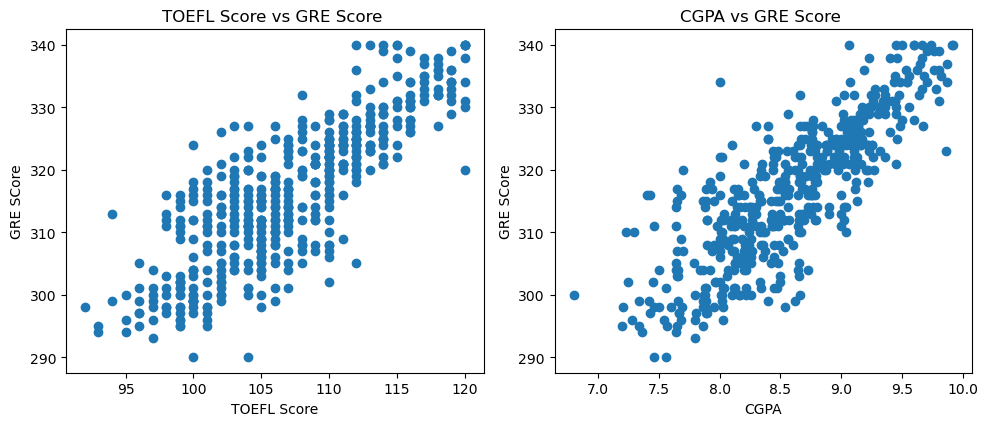

In [21]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['GRE Score'])
    plt.title(x+' vs GRE Score ')
    plt.ylabel('GRE SCore')
    plt.xlabel(x)

plt.figure(figsize=(10,20))


scatter('TOEFL Score', 1)
scatter('CGPA', 2)


plt.tight_layout()

This plot show the strong correlation between GRE score and TOEFL score and CGPA. As per above description, most of the students who have CGPA 7.5 to 8.5 are able to get GRE Score between 300 to 320 and most of the students who get that GRE score, are able to get TOEFL score between 100 and 110. <br>
More such relationships can be observed in the pairplot shown ahead.

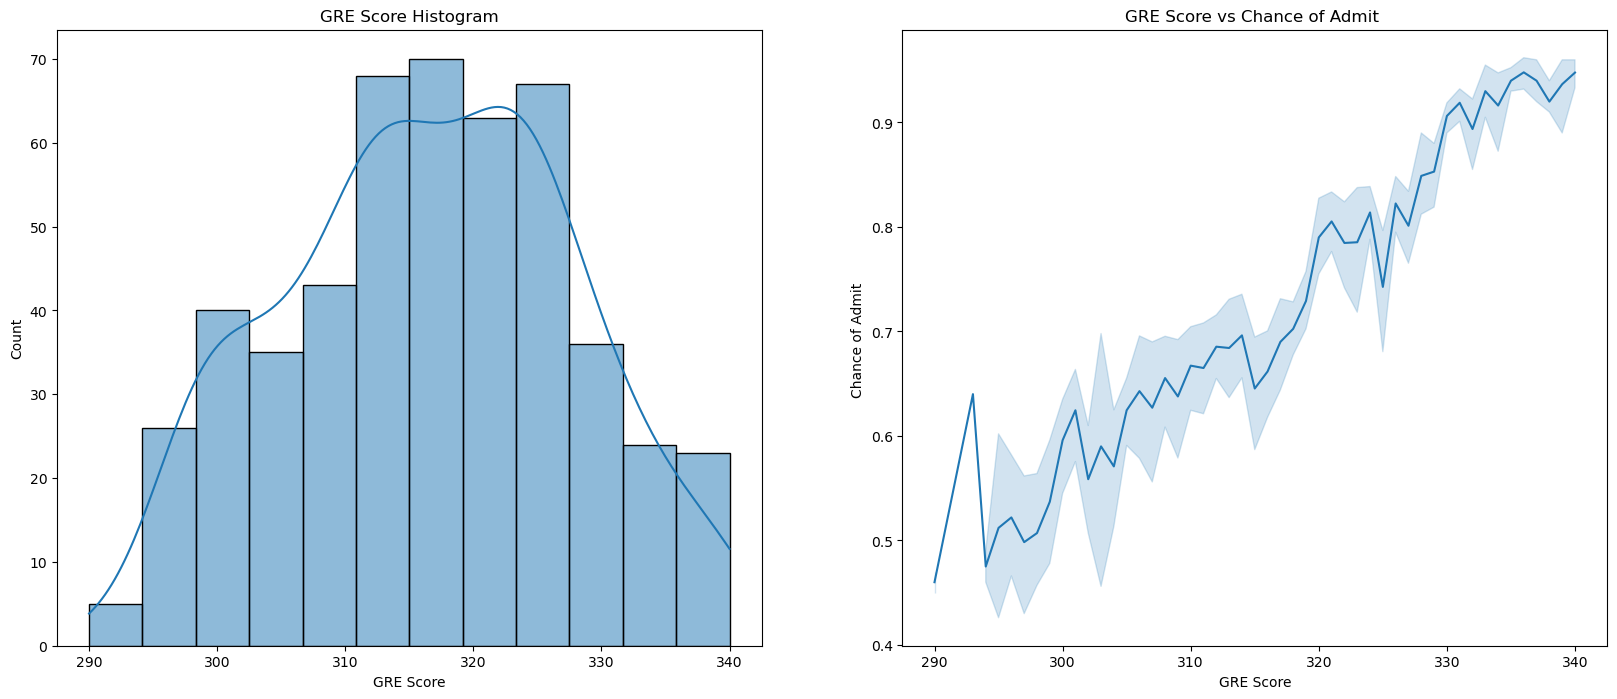

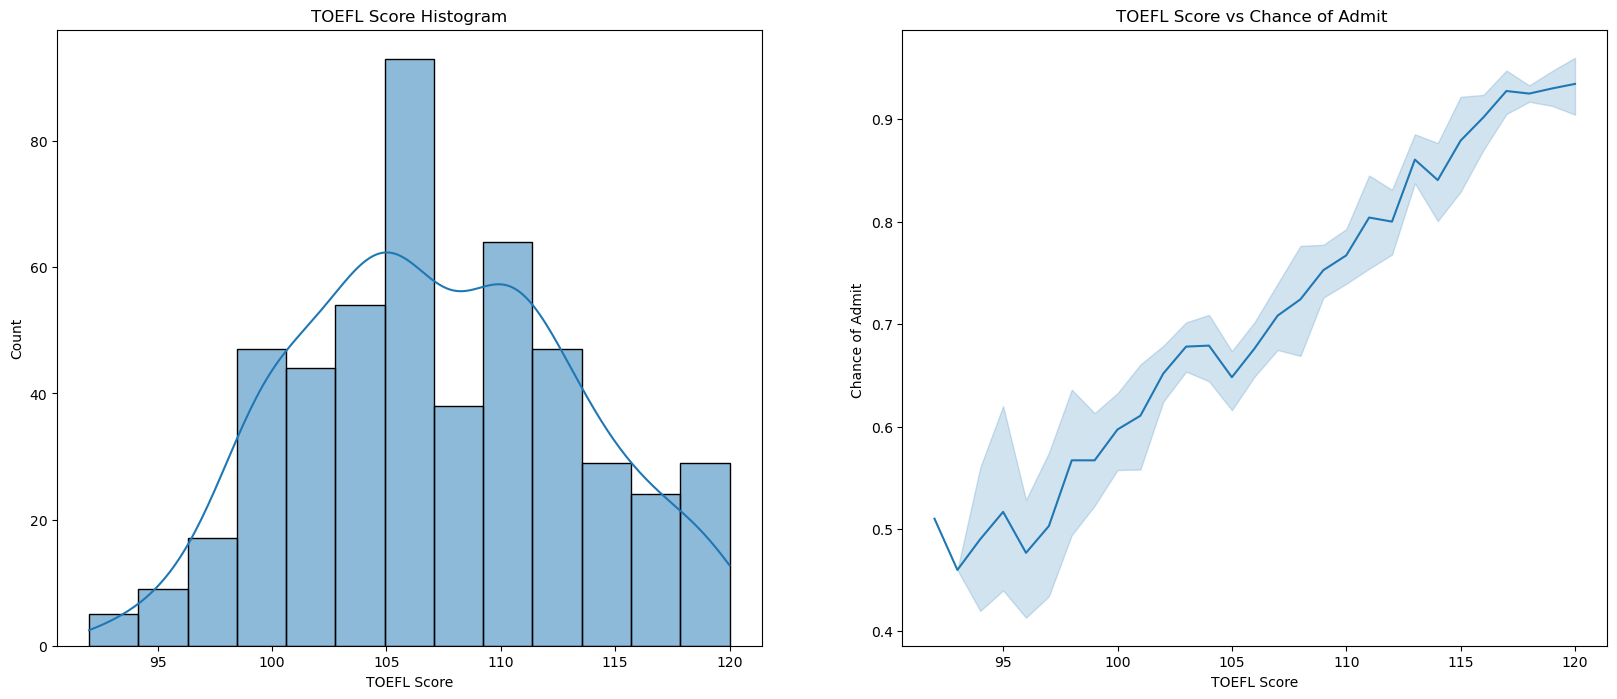

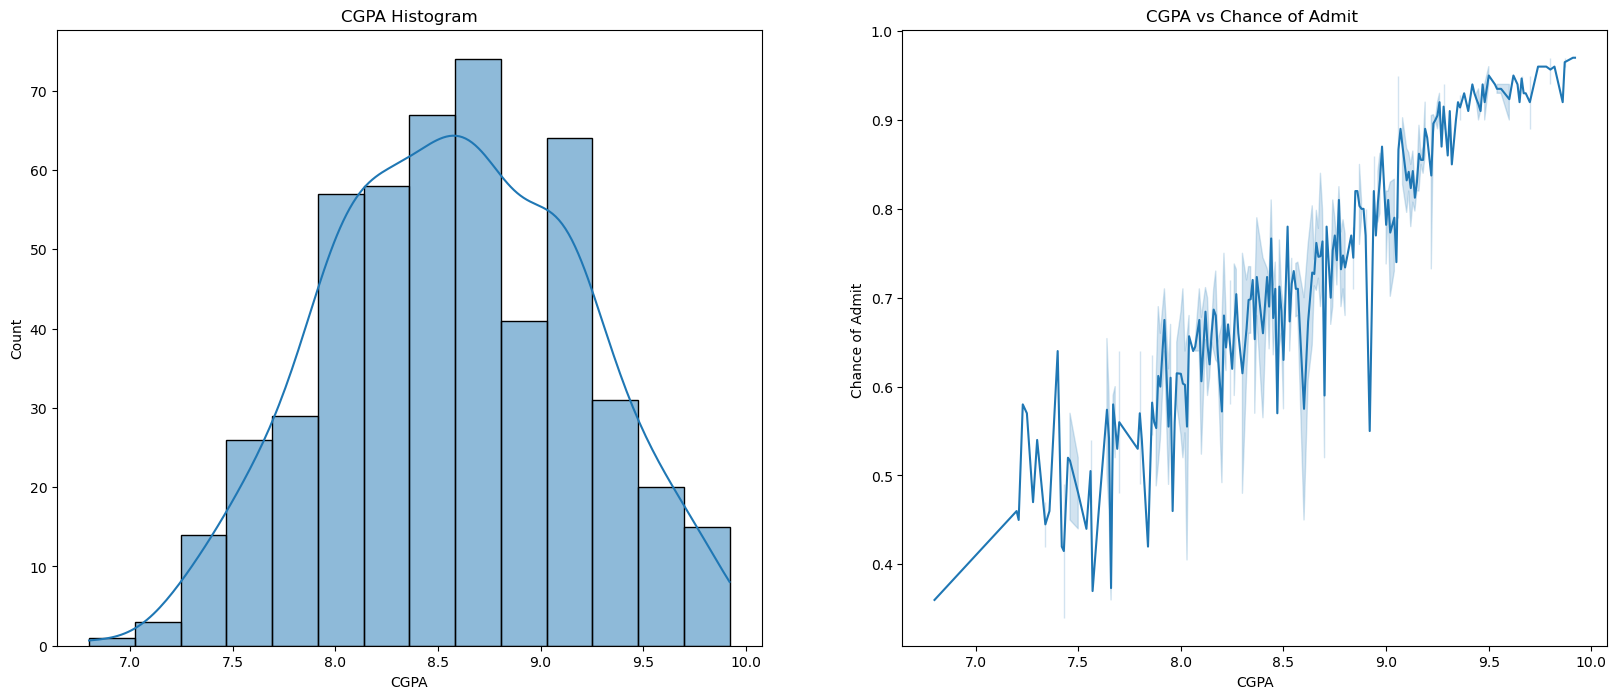

In [22]:
# Another visualization for analyzing the same numerical data
indep_variables = ["GRE Score","TOEFL Score","CGPA"]
for col in indep_variables:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f'{col} Histogram')
    sns.histplot(df[col],kde = True)

    plt.subplot(1,2,2)
    plt.title(f'{col} vs Chance of Admit ')
    sns.lineplot(x=df[col], y=df['Chance of Admit '])

plt.show()

###### Observation
- GRE Score greater than 320 have probablity of admission greater than 0.7
- TOFL score greater than 105 have probablity of admission greater than 110
- Higher CGPA increases the chances of admission.

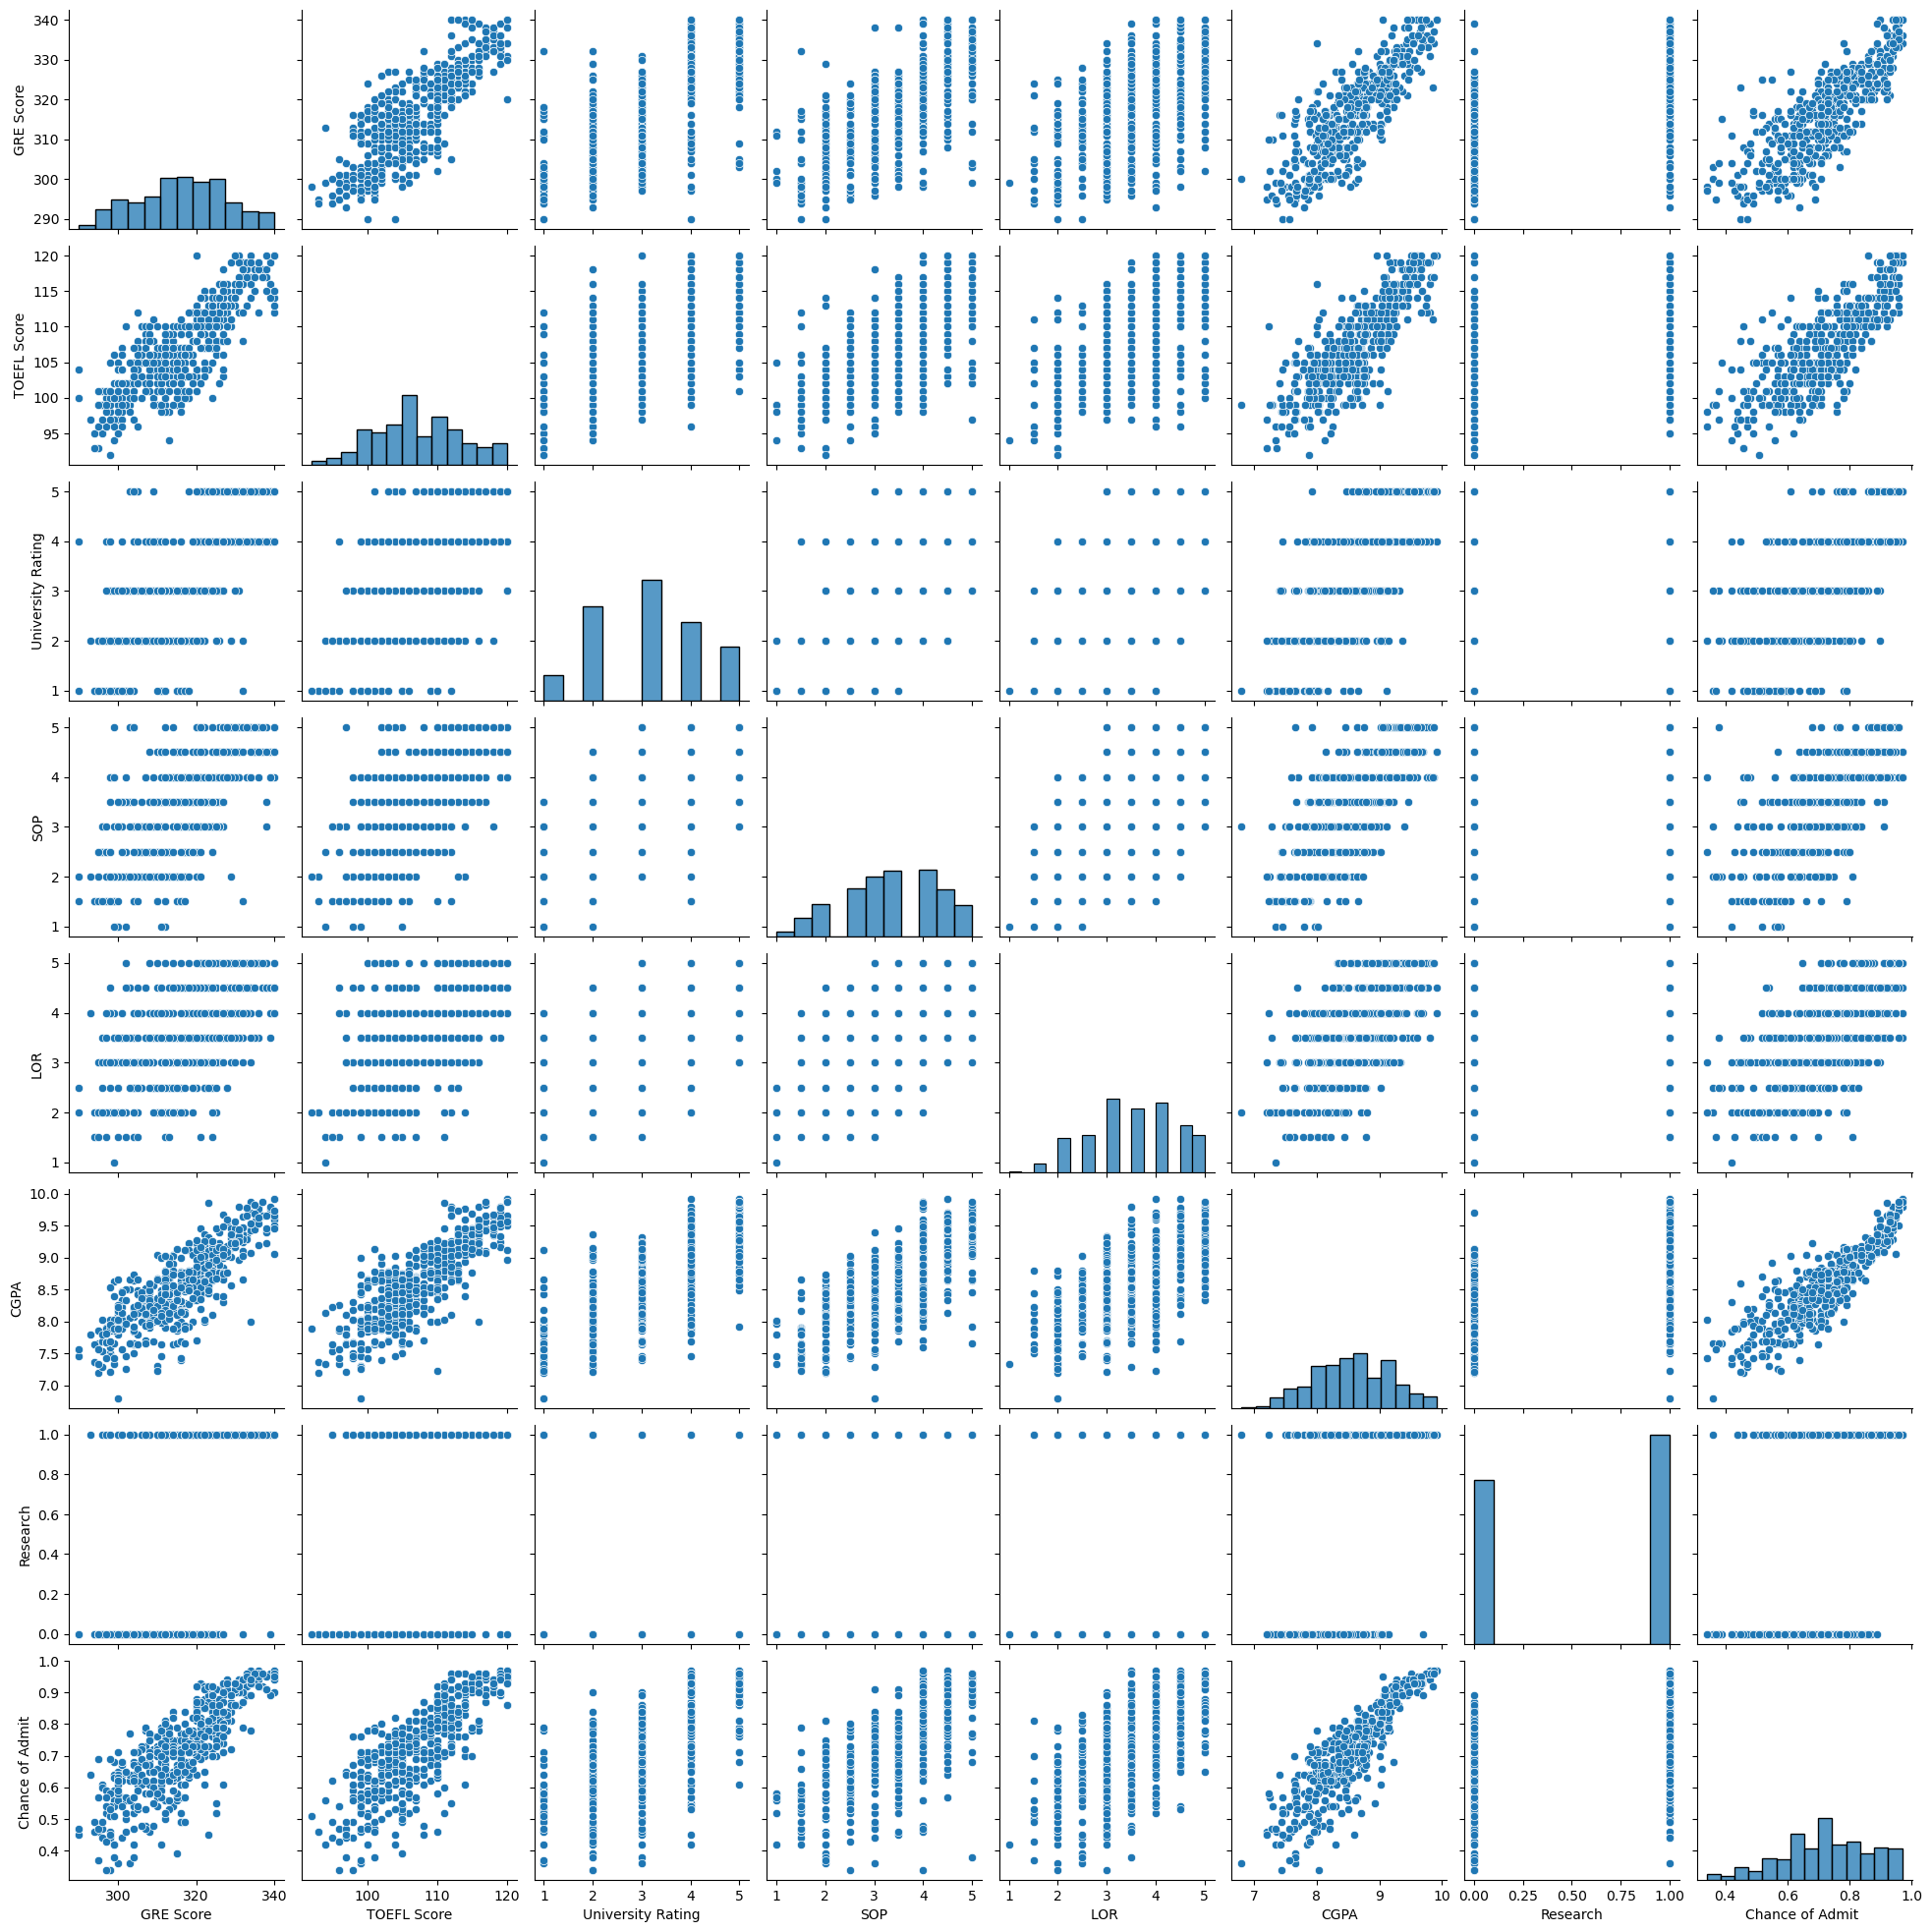

In [23]:
sns.pairplot(df)
plt.show()

This pairplot shows all the possible plots for bivariate analysis. As per this we can say that almost all the variables observes a strong positive correlation with each other. <br>
This can also be observed with the following table:

In [24]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1.0, 'Heatmap for correlation among variables')

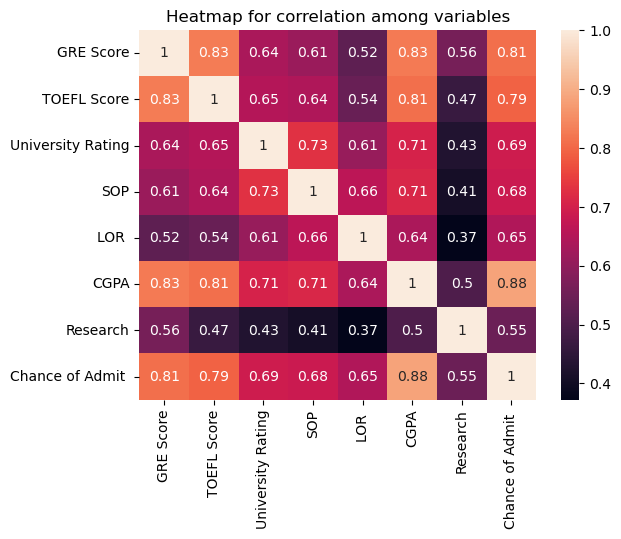

In [25]:
sns.heatmap(df.corr(), data = df, annot = True)
plt.title("Heatmap for correlation among variables")

###  Outliers

#### Detection

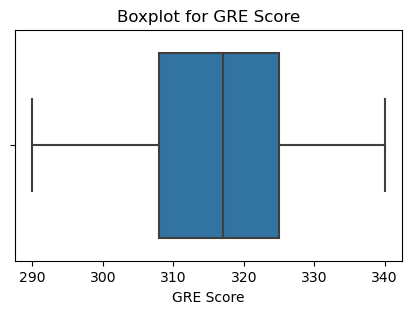

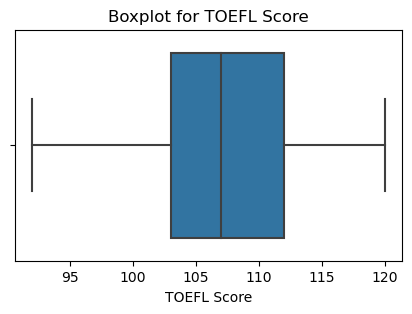

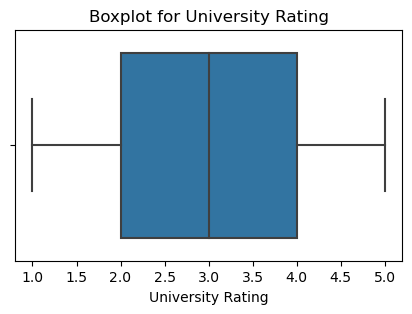

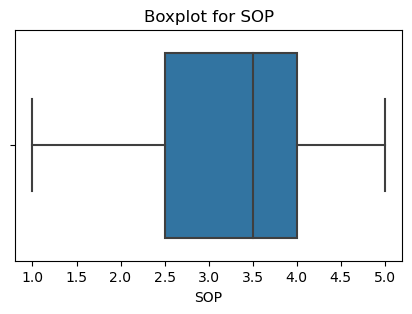

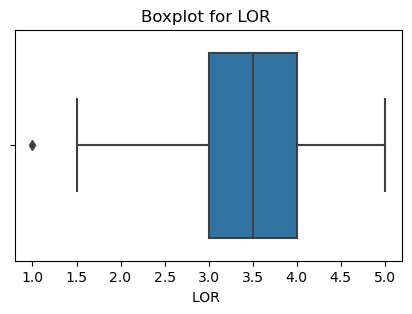

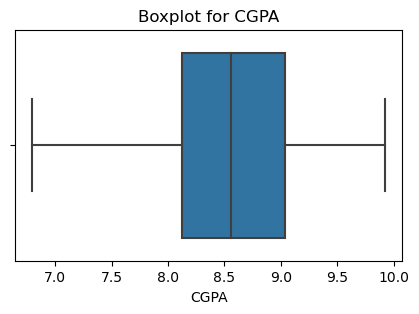

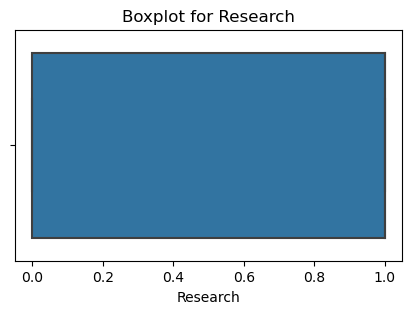

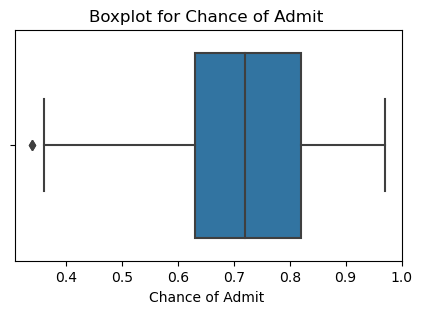

In [26]:
box_col = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for i in box_col:
    plt.figure(figsize = (5,3))
    sns.boxplot(data = df, x = i)
    plt.title(f"Boxplot for {i}")
#     outlier_detection(i, data = df)
    plt.show()

In [27]:
box_col = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for col in box_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    k = df[(df[col] < q1 -(1.5*iqr)) |(df[col] > q3 + (1.5*iqr))]
    print (f"count of outliers in the given data for the {col}: ", len(k))

count of outliers in the given data for the GRE Score:  0
count of outliers in the given data for the TOEFL Score:  0
count of outliers in the given data for the University Rating:  0
count of outliers in the given data for the SOP:  0
count of outliers in the given data for the LOR :  1
count of outliers in the given data for the CGPA:  0
count of outliers in the given data for the Research:  0
count of outliers in the given data for the Chance of Admit :  2


OBSERVATION <br>
- 2 ouliters present in column *Chance of Admit*
- 1 outlier present in column *LOR*
- Remaining columns have NO outliers present. <br>
<br>
However, OLS (Ordinary Least Square) linear regression is extremly sensitive model. It can be easily biased with just one outlier. Thus, we need to remove those outliers.

#### Treatment: *Removal*

In [28]:
# Outlier Removal
df2 = df.copy()

In [29]:
col_with_outlier = ['Chance of Admit ', 'LOR ']
for col in col_with_outlier:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    df2 = df2[(df2[col] >= (q1 - 1.5*iqr)) & (df2[col] <= (q3 + 1.5*iqr))]

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          497 non-null    int64  
 1   TOEFL Score        497 non-null    int64  
 2   University Rating  497 non-null    int64  
 3   SOP                497 non-null    float64
 4   LOR                497 non-null    float64
 5   CGPA               497 non-null    float64
 6   Research           497 non-null    int64  
 7   Chance of Admit    497 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 34.9 KB


##### Standardizing data

In [31]:
for col in df2.columns:
    mean = df2[col].mean()
    std = np.std(df2[col])
    df2[col] = (df2[col] - mean)/std

In [32]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,1.414372
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.260470
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,-0.028006
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.548945
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,-0.532838


In [33]:
df2.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02,4.970000e+02
mean,1.507848e-16,-6.069368e-16,-1.885369e-16,-6.210101e-17,1.720064e-16,-7.545719e-15,-1.965787e-16,2.609806e-15
std,1.001008e+00,1.001008e+00,1.001008e+00,1.001008e+00,1.001008e+00,1.001008e+00,1.001008e+00,1.001008e+00
min,-2.368080e+00,-2.530596e+00,-1.862609e+00,-2.412871e+00,-2.171259e+00,-2.966791e+00,-1.135924e+00,-2.624286e+00
25%,-7.646254e-01,-7.063913e-01,-9.851525e-01,-8.916910e-01,-5.370606e-01,-7.529343e-01,-1.135924e+00,-6.049571e-01
50%,3.710208e-02,-4.304416e-02,-1.076959e-01,1.224290e-01,7.672294e-03,-3.717615e-02,8.803408e-01,-2.800593e-02
75%,7.497487e-01,7.861398e-01,7.697608e-01,6.294889e-01,5.524051e-01,7.618097e-01,8.803408e-01,6.931831e-01
max,2.085961e+00,2.112834e+00,1.647217e+00,1.643609e+00,1.641871e+00,2.226617e+00,8.803408e-01,1.774967e+00


In [34]:
df2.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824360,0.631514,0.614286,0.518457,0.823739,0.558932,0.807594
TOEFL Score,0.824360,1.000000,0.645349,0.643806,0.533263,0.807282,0.461071,0.788128
University Rating,0.631514,0.645349,1.000000,0.727569,0.603831,0.701979,0.422304,0.688621
SOP,0.614286,0.643806,0.727569,1.000000,0.659858,0.711175,0.406490,0.690654
LOR,0.518457,0.533263,0.603831,0.659858,1.000000,0.631188,0.366721,0.641114
CGPA,0.823739,0.807282,0.701979,0.711175,0.631188,1.000000,0.496515,0.883121
Research,0.558932,0.461071,0.422304,0.406490,0.366721,0.496515,1.000000,0.541346
Chance of Admit,0.807594,0.788128,0.688621,0.690654,0.641114,0.883121,0.541346,1.000000


Since, GRE Score, TOEFL, CGPA and Chance of Admit  are strongly correlated, thus we can take the average score of these there variables to define one score.

In [35]:
df2["merit_point"] = round((df2['GRE Score'] + df2['TOEFL Score'] + df2['CGPA'])/3,3)

In [36]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
df2 = swap_columns(df2, 'Chance of Admit ', 'merit_point')

In [37]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,merit_point,Chance of Admit
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,1.792,1.414372
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.365,0.260470
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,-0.521,-0.028006
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.361,0.548945
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,-0.519,-0.532838


In [38]:
df2.drop(["GRE Score","TOEFL Score","CGPA"], inplace = True, axis = 1)

In [39]:
df2.head(9)

,University Rating,SOP,LOR,Research,merit_point,Chance of Admit
0,0.769761,1.136549,1.097138,0.880341,1.792,1.414372
1,0.769761,0.629489,1.097138,0.880341,0.365,0.260470
2,-0.107696,-0.384631,0.007672,0.880341,-0.521,-0.028006
3,-0.107696,0.122429,-1.081793,0.880341,0.361,0.548945
4,-0.985153,-1.398751,-0.537061,-1.135924,-0.519,-0.532838
5,1.647217,1.136549,-0.537061,0.880341,1.247,1.270134
6,-0.107696,-0.384631,0.552405,0.880341,0.015,0.188351
7,-0.985153,-0.384631,0.552405,-1.135924,-0.979,-0.316482
8,-1.862609,-1.398751,-2.171259,-1.135924,-1.047,-1.614622


## MODELLING : Linear Regression

In [40]:
df2.columns[:8]

Index(['University Rating', 'SOP', 'LOR ', 'Research', 'merit_point',
       'Chance of Admit '],
      dtype='object')

In [41]:
X = df2[df2.columns[:5]]
y = df2['Chance of Admit ']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)

In [43]:
X_train

,University Rating,SOP,LOR,Research,merit_point
229,0.769761,-0.384631,-0.537061,0.880341,0.664
51,-0.985153,-1.905811,0.007672,0.880341,-0.916
434,-0.107696,0.122429,-0.537061,-1.135924,-0.756
405,-0.107696,-0.891691,-0.537061,-1.135924,-1.518
162,-0.107696,-0.384631,-0.537061,-1.135924,0.093
...,...,...,...,...,...
443,1.647217,1.136549,1.097138,0.880341,0.824
166,-0.107696,0.122429,1.641871,-1.135924,-0.864
7,-0.985153,-0.384631,0.552405,-1.135924,-0.979
220,-0.107696,0.629489,0.552405,-1.135924,-0.249


#### Using statsmodel

In [44]:
import statsmodels.api as sm

In [45]:
X_train_1 = X_train
X_train_1.head()

,University Rating,SOP,LOR,Research,merit_point
229,0.769761,-0.384631,-0.537061,0.880341,0.664
51,-0.985153,-1.905811,0.007672,0.880341,-0.916
434,-0.107696,0.122429,-0.537061,-1.135924,-0.756
405,-0.107696,-0.891691,-0.537061,-1.135924,-1.518
162,-0.107696,-0.384631,-0.537061,-1.135924,0.093


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
def stats_reg_model(X,y):
    X = sm.add_constant(X) 
    sm_model = sm.OLS(y,X).fit()
    print(sm_model.summary())
    return X
def VIF_value(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [48]:
X_train_new = stats_reg_model(X_train_1,y_train)
VIF_value(X_train_new)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     330.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          2.76e-133
Time:                        21:13:20   Log-Likelihood:                -212.15
No. Observations:                 372   AIC:                             436.3
Df Residuals:                     366   BIC:                             459.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0009      0.02

,Features,VIF
2,SOP,2.72
5,merit_point,2.72
1,University Rating,2.61
3,LOR,2.04
4,Research,1.41
0,const,1.01


p-value for the columns "SOP" and "Research" is greater than 0.05, and hence they are insignificant. Hence, we can drop to enhance the interpretability of our model.

#### Model 2

In [49]:
X_train_new = X_train_new.drop(['SOP'],axis = 1)
X_train_new = stats_reg_model(X_train_new,y_train)
VIF_value(X_train_new)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     411.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          3.11e-134
Time:                        21:13:20   Log-Likelihood:                -213.06
No. Observations:                 372   AIC:                             436.1
Df Residuals:                     367   BIC:                             455.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      0.02

,Features,VIF
4,merit_point,2.56
1,University Rating,2.25
2,LOR,1.80
3,Research,1.41
0,const,1.00


p-value for the column "Research" is greater than 0.05 thus we'll drop this column next.

#### Model 3

In [50]:
X_train_new = X_train_new.drop(['Research'],axis = 1)
X_train_new = stats_reg_model(X_train_new,y_train)
VIF_value(X_train_new)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     545.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          5.67e-135
Time:                        21:13:20   Log-Likelihood:                -214.61
No. Observations:                 372   AIC:                             437.2
Df Residuals:                     368   BIC:                             452.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0023      0.02

,Features,VIF
3,merit_point,2.28
1,University Rating,2.24
2,LOR,1.80
0,const,1.00


###### OBSERVATIONS
- p-value of all the columns are less than 0.05, thus only significant variables are present in our model.
- But all the columns have VIF < 5 thus there is no need to drop any column. 
- R-squared is 0.816, and adjusted R_squared is 0.815 which suggests that model is good.
- Jarque-Bera (JB) is nowhere close to 0 this shows that the sample data do not have a normal distribution.
- Variables "SOP" and "Research" seems to be of low significance.
- variable merit_point have the highest weightage and thus have the highest impact on the prediction of 'Chance of Admit ".


VIF Score for all the columns is less than 5, this implies that there multicollinearity doesn't exist among variables. Also, not a significant change was observed. All the variables have very less impact on the predictions because of the less value of weights.

In [51]:
##### RESIDUAL ANALYSIS

In [52]:
sm_model = sm.OLS(y_train,X_train_new).fit()
y_train_admit_prob = sm_model.predict(X_train_new)

C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

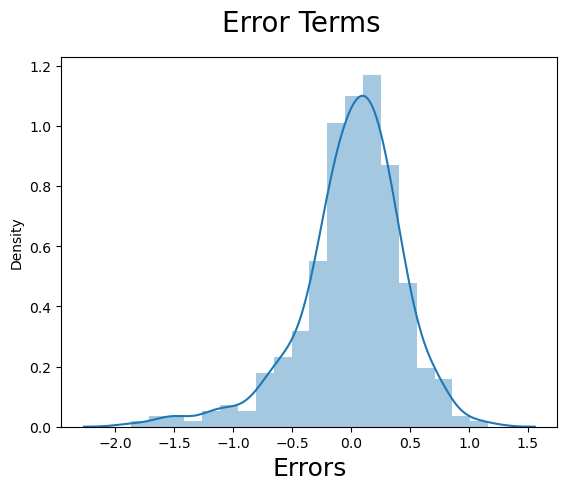

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_admit_prob), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [54]:
print("Mean of residual error:",round(np.mean(y_train - y_train_admit_prob),3))

Mean of residual error: -0.0


#### Testing the assumptions of the linear regression model

##### 1. Mean of the Residual should be zero

In [55]:
# MEAN OF RESIDUAL SHOULD BE ZERO
resid_values =  y_train - y_train_admit_prob 
mean_residuals = round(resid_values.mean(),3)
print("Mean of residuals: ", mean_residuals)

Mean of residuals:  -0.0


The mean of residual is very close to zero.

In [56]:
df_results_sm = pd.DataFrame({"Actual":y_train,'Predicted': y_train_admit_prob})
df_results_sm['residuals'] =  y_train_admit_prob - y_train

##### 2. Linearity of variables (no pattern in the residual plot)

C:\Users\A Singh\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


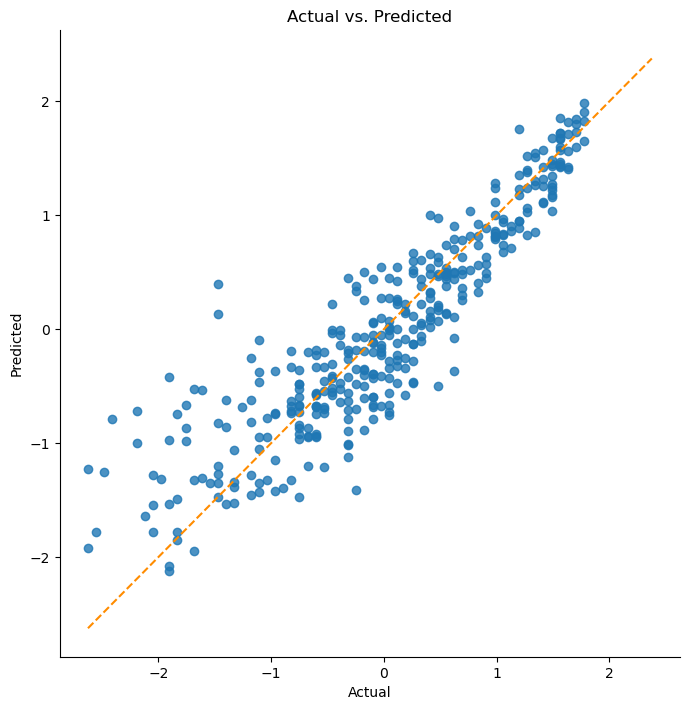

In [57]:
sns.lmplot(x='Actual', y='Predicted', data=df_results_sm, fit_reg=False, size=7)
# plotting the diagnal line
line_coords = np.arange(df_results_sm.min().min(), df_results_sm.max().max()+1)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

This plot shows that there is slight non-collinearity. If we ignore few point in the left above the line then there seems to be even spread across the line.

##### 3. Test for Homoscedasticity

In [58]:
df_results_sm.columns

Index(['Actual', 'Predicted', 'residuals'], dtype='object')

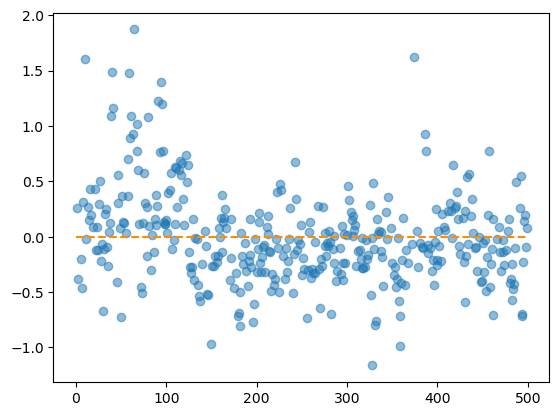

In [59]:
plt.scatter(x=df_results_sm.index, y=df_results_sm["residuals"], alpha=0.5)
plt.plot(np.repeat(0, df_results_sm.index.max()), color='darkorange', linestyle='--')

No Heteroscadasticity is observed.

##### 4. Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

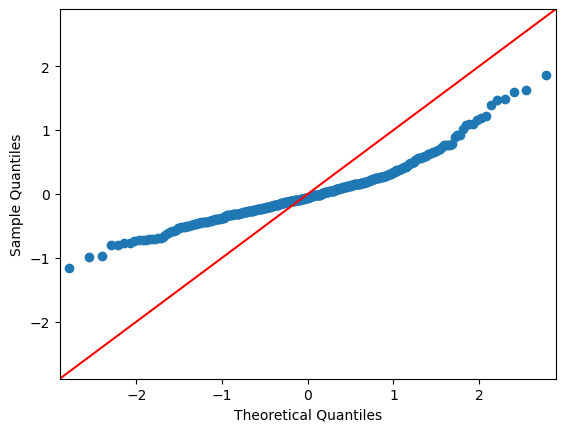

In [60]:
sm.qqplot(df_results_sm["residuals"],line = "45")
plt.show()

Thus we can say that residual aren't normally distributed.<br>

In [61]:
# Another way to check normality
from statsmodels.stats.diagnostic import normal_ad # Anderson-Darling test
p_value = normal_ad(df_results_sm['residuals'])[1]
print('p-value from the Anderson-darling test (below 0.05 generally means non-normal):', np.round(p_value,3))

p-value from the Anderson-darling test (below 0.05 generally means non-normal): 0.0


The error terms are not normally distributed. Hence assumption failed.

#####  5. Check for multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
VIF_value(X_train_new)

,Features,VIF
3,merit_point,2.28
1,University Rating,2.24
2,LOR,1.80
0,const,1.00


VIF for all the columns is less than 5, thus there is no multicollinearity. Assumption satisfied.

#####  5. Autocorrelation

In [65]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     545.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          5.67e-135
Time:                        21:14:10   Log-Likelihood:                -214.61
No. Observations:                 372   AIC:                             437.2
Df Residuals:                     368   BIC:                             452.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0023      0.02

This model gave Durbin-Watson value between (1.5,2.5), thus no auto-correlation exists. Assumption satisfied.

##### Model Performance Evaluation

In [66]:
sm_model = sm.OLS(y_train,X_train_new).fit()
y_train_admit_prob = sm_model.predict(X_train_new)

In [67]:
#  make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred_sm = sm_model.predict(X_test_new)

In [68]:
# Metrics for model performances
def mae(y_pred,y_test): # Mean Absolute Error
    return round((abs(y_pred-y_test)).mean(),3)
def rmse(y_pred,y_test): # Root Mean Square Error
    return round(((y_pred-y_test)**2).mean(),3)
def adj_r_sq(r_sq,N,p): # Adjusted r_sq_error
    return 1-(((1-r_sq)*(N-1) )/(N-p-1))  

In [69]:
print(f"Mean Absolute Error (MAE): {mae(y_pred_sm,y_test)}")
print(f"Root Mean Square Error (RMSE): {rmse(y_pred_sm,y_test)}")

# R^2
from sklearn.metrics import r2_score 

print(f"R square value: {r2_score(y_test,y_pred_sm)}")
print(f"Adjusted R^2: {adj_r_sq(r2_score(y_test,y_pred_sm),len(X),len(X_test))}")

Mean Absolute Error (MAE): 0.353
Root Mean Square Error (RMSE): 0.245
R square value: 0.7475275140634754
Adjusted R^2: 0.6624626603112771


This shows that R2 score is less than what we got in our model from trained dataset. This implies that model hasn't performed same as our trained model. But R2 value 0.7586 and Adjusted R2 value is not bad either and can be accepted. <br>
However, there is scope of improving the model. As per this business case, we can aim for R2 square greater than 0.8.

#### Modelling using SKLEARN

In [70]:
X2 = X.to_numpy()
y2 = y.to_numpy()

In [71]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.25, random_state = 40)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [75]:
model.fit(X2_train, y2_train)
y_pred_sk = model.predict(X2_test)

In [76]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred_sk}).head()

,Actual,Predict
393,0.332589,-0.267071
451,1.198015,0.968848
228,-0.100125,0.233230
152,0.981659,0.942893
445,1.342253,1.246062


## Model performance evaluation

In [77]:
print(f"Mean Absolute Error (MAE): {mae(y_pred_sk,y2_test)}")
print(f"Root Mean Square Error (RMSE): {rmse(y_pred_sk,y2_test)}")
print(f"R square value: {r2_score(y2_test,y_pred_sk)}")
print(f"Adjusted R^2: {adj_r_sq(r2_score(y2_test,y_pred_sk),len(X),len(X2_test))}")

Mean Absolute Error (MAE): 0.345
Root Mean Square Error (RMSE): 0.234
R square value: 0.7586822459241761
Adjusted R^2: 0.677375725009141


After using both statmodel and sklearn for modelling we can say that model, both the model have given almost the same results with or without removal of insignificant features.

#### TRYING RIDGE and LASSO Regression

In [78]:
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

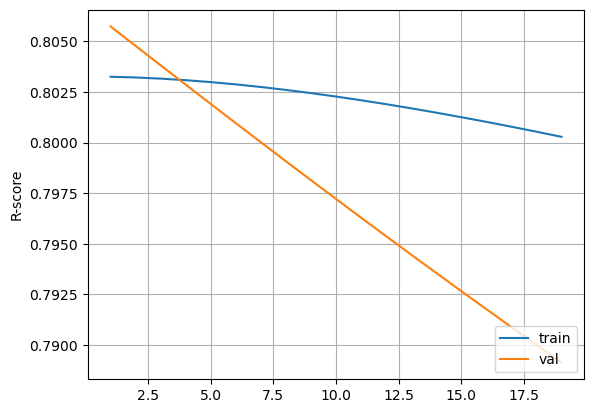

In [80]:
from sklearn.linear_model import Ridge
train_scores = []
val_scores = []

for alpha in range(1,20):
    lr_model_ridge = Ridge(alpha)
    lr_model_ridge.fit(X_train, y_train)
    train_score = lr_model_ridge.score(X_train, y_train)
    val_score = lr_model_ridge.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1,20)), train_scores, label="train")
plt.plot(list(range(1, 20)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("")
plt.ylabel("R-score")
plt.grid()
plt.show()

Train the model with alpha = 2.75

In [81]:
new_model_lr_ridge = Ridge(2.75)
new_model_lr_ridge.fit(X_train, y_train)
train_score = new_model_lr_ridge.score(X_train, y_train)
print(train_score)
val_score = new_model_lr_ridge.score(X_val, y_val)
print(val_score)


0.8031771011016829
0.8040561658261098


This R^2 is good enough value for our model.

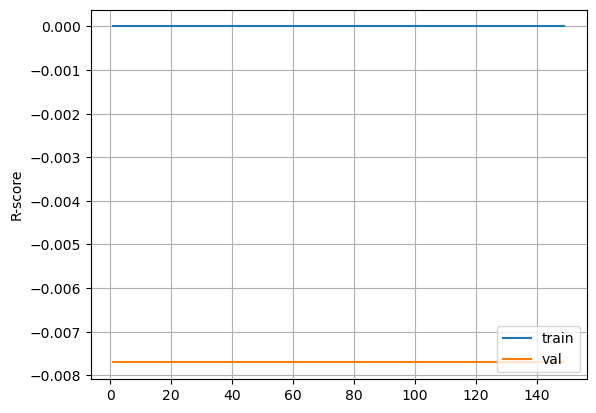

In [82]:
from sklearn.linear_model import Lasso
train_scores = []
val_scores = []

for alpha in range(1,150):
    lr_model_lasso = Lasso(alpha)
    lr_model_lasso.fit(X_train, y_train)
    train_score = lr_model_lasso.score(X_train, y_train)
    val_score = lr_model_lasso.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1,150)), train_scores, label="train")
plt.plot(list(range(1, 150)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("")
plt.ylabel("R-score")
plt.grid()
plt.show()

R2 score value is decreased in both training and testing dataset. <br>
This shows that removal of feature from the dataset reduces the performace of the model irrespective of the chosen value of alpha. 

###  Insights and Recommendations

######  Insights

- Variables SOP and Research  were found to have p-value greater than `0.05`, thus proving them significant. Thus, those columns were removed to enhance the interpretability of the model.
- New feature (metric point) created from the average of standardized *GRE Score, TOEFL Score and CGPA* had the highest impact of all the variables on the Chance of Admit i.e. metric point had the highest coefficient in the linear regression model.
- A great model not only helps in making better predictions but also helps in building customer trust in the organization and hence establishing a brand value in the market.
Different algorithm needs to be tested as few of the assumption of linear regression failed.

###### RECOMMENDATIONS

- Dataset of 500 rows is small to build a model that can make better predictions. A large dataset will help in better training and in making improved predictions.
- More features can be added that may help in making predictions. More than 50% of the candidates apply for research. Adding features, like *college_grad_international_rank, number of published papers, work experience,scholarships, interested_program etc. can help in making better predictions about admission*.
